# 应急响应

### 应急溯源难点,木马免杀,没有公开的特征码,通过文件包含,远程连马,apache中间件默认只记录get请求,不记录post请求,操作系统只记录操作系统日志,不记录WEB日志.安全设备暂时没有新病毒的特征码,等等

### 流程:准备阶段→启动阶段→抑制阶段→根除阶段→恢复阶段→跟进阶段

## 准备阶段
- 发现异常
- 如发现,形成安全事件报告
- 查找安全事件原因
- 确定安全事件起因,性质和影响范围
- 确定安全事件的应急处理方案.

## 启动阶段
- 一般就是前期准备后,和甲方开会商讨配合流程

## 抑制阶段
- 物理隔离中毒服务器,避免服务器作为跳板用来攻击内网
- 修改密码,杀毒,找漏洞

## 根除阶段
- 找到系统漏洞,修补漏洞
- 查杀木马

## 恢复阶段
- 连接网络,恢复上线

## 跟进阶段
- 重点关注,看是否还会遭受攻击

# 应急排查详解
- 常见的应急事件分类
    1. WEB入侵,网页挂马,主页篡改,webshell
    2. 系统入侵,病毒木马,勒索软件,远控后门
    3. 网络共计 DDOS ,DNS劫持 ARP欺骗

## 1. Windows入侵的排查思路  
   - 检查系统账号安全
        1. net user
        2. 计算机管理-用户和组,看无用账户是否禁用,和他们的隶属于关系. 1和2无法看到隐藏账号,只能通过3的方式注册表查看
        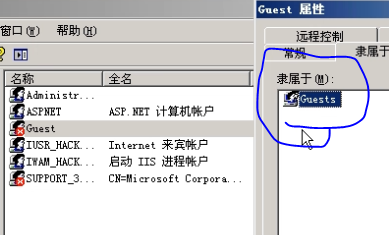
        3. 注册表查看用户信息 查看路径:HKEY_LOCAL_MACHINE\SAM\SAM\Domains\Account\Users\Names
        **SAM\SAM这个表默认是无法展开的,需要权限里给权限或者添加everyone账号刷新后才能展开**
        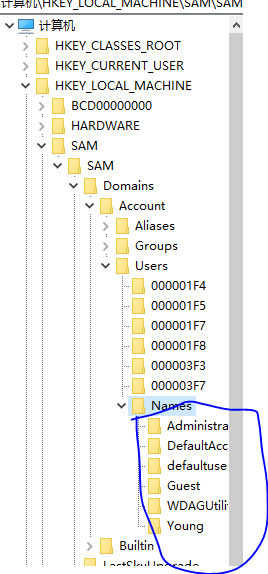
    
   - 检查弱口令,对公网开发的端口
        1. 查看远程管理是否被勾选
        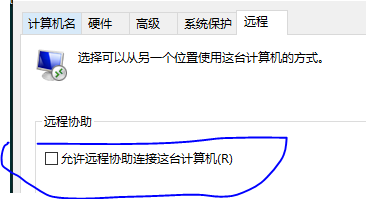
        2. netstat -ano | findstr "ESTABLISHED" 重点排查established的端口
        3. 自己用Nmap扫描自己开放的所有端口  
        
   - web查杀工具:windows: D盾(主要针对IIS以及asp php木马),Linux:河马webshell 查杀  
   
   
   - 查看登陆日志,导出应用程序日志,安全日志,系统日志,可以结合log parser分析
       日志查看命令:eventvwr 安全里查看登陆日志  540登陆成功
   - 查看进程
       输入msinfo32,在软件环境-正在运行任务中查看进程,创建时间,启动时间等.  
       打开D盾-进程查看,关注没有签名信息的进程  
       通过微软提供的 Process Explorer等工具排查  
       用第三方(火绒剑)查看进程和子进程,重点排查没签名信息的进程,没描述信息的进程,路径不合法的进程,占用CPU 内存资源过高的进程,进程的宿主  
   - 查看服务
       使用takslist /svc 查看进程对应的服务
   - 检查启动项
       查看所有程序中的启动项  
       msconfig 查看启动加载  
       HKEY_CURRENT_USER\Software\Microsoft\Windows\CurrentVersion\Run  
       HKEY_LOCAL_MACHINE\SOFTWARE\Windows\CurrentVersion\Run  
       HKEY_LOCAL_MACHINE\SOFTWARE\Windows\CurrentVersion\Runonce  
       上述三处注册表查看是否有异常启动项  
       利用安全软件查看启动项,开机时间管理  
       组策略:计算机配置-Window设置-脚本(启动/关机)  
       服务自启动 service.msc  
       任务计划  
       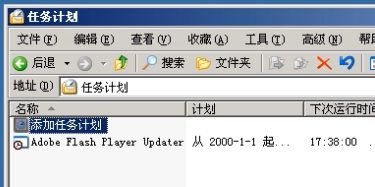
   - 查看版本信息
       cmd里输入systeminfo,查看系统信息,打补丁情况
   - 查看可疑目录以及文件
       重点检查c:\Document and Settings 或者 c:\Users\, 小技巧,可以用修改时间创建时间进行查看最近的文件
   - 日志分析
       操作系统的日志默认记录不全,通过组策略开启审查策略
       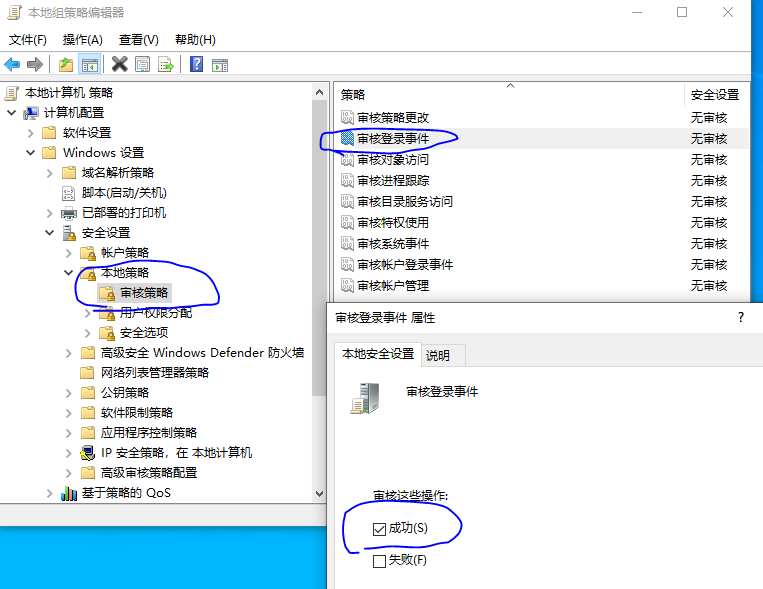
       web访问日志:找到中间件日志,打包到本地分析,工具推荐EmEditor,Linux可以使用Shell命令组合查询分析
       

## 2.Linux入侵的排查思路 

# 排查工具推荐
- 病毒分析 ：
PCHunter：http://www.xuetr.com  
火绒剑：https://www.huorong.cn  
Process Explorer：https://docs.microsoft.com/zh-cn/sysinternals/downloads/process-explorer  
processhacker：https://processhacker.sourceforge.io/downloads.php  
autoruns：https://docs.microsoft.com/en-us/sysinternals/downloads/autoruns  
OTL：https://www.bleepingcomputer.com/download/otl/  
- 病毒查杀：
卡巴斯基：http://devbuilds.kaspersky-labs.com/devbuilds/KVRT/latest/full/KVRT.exe
 （推荐理由：绿色版、最新病毒库）  
大蜘蛛：http://free.drweb.ru/download+cureit+free
 （推荐理由：扫描快、一次下载只能用1周，更新病毒库）  
火绒安全软件：https://www.huorong.cn  
360杀毒：http://sd.360.cn/download_center.html  
- 病毒动态：
CVERC-国家计算机病毒应急处理中心：http://www.cverc.org.cn  
微步在线威胁情报社区：https://x.threatbook.cn  
火绒安全论坛：http://bbs.huorong.cn/forum-59-1.html  
爱毒霸社区：http://bbs.duba.net  
腾讯电脑管家：http://bbs.guanjia.qq.com/forum-2-1.html  
- 在线病毒扫描网站：
http://www.virscan.org //多引擎在线病毒扫描网 v1.02，当前支持 41 款杀毒引擎  
https://habo.qq.com //腾讯哈勃分析系统  
https://virusscan.jotti.org //Jotti恶意软件扫描系统  
http://www.scanvir.com //针对计算机病毒、手机病毒、可疑文件等进行检测分析  
- webshell查杀：
D盾_Web查杀：http://www.d99net.net/index.asp  
河马webshell查杀：http://www.shellpub.com  
深信服Webshell网站后门检测工具：http://edr.sangfor.com.cn/backdoor_detection.html  
Safe3：http://www.uusec.com/webshell.zip  
